# Discrete Response and Z Transforms

## https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cont2discrete.html

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import numpy as np
from scipy.signal import cont2discrete, lti, dlti, dstep, dlsim, lsim, ss2tf

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 14
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()

def my_stem(t,y,ax='ax1',lab='y'):
    markerline, stemline, baseline = ax.stem(t, y, label=lab,linefmt='r-',markerfmt='ro',basefmt='r.')
    plt.setp(stemline, linewidth = .25)
    plt.setp(markerline, markersize = 8)
    markerline.set_markerfacecolor('red')

In [83]:
##Will discretize using a time step of dt
dt = 1.3

In [84]:
Tstep = 1 # step start time
Tf = 6 # how long a step
T=np.linspace(0, Tstep+Tf, 1000) # finely discretized cts time
T_d = np.arange(0,max(T)+1,dt) # coarse discrete time

In [85]:
# cts system
A = np.array([[0, 1],[-10., -.9]])
B = np.array([[0],[10.]])
C = np.array([[1., 0]])
D = np.array([[0.]])
l_system = lti(A, B, C, D)

In [86]:
#form discrete equivalent
#d_system = cont2discrete((A, B, C, D), dt)
d_system = l_system.to_discrete(dt)

In [87]:
# input
u = np.zeros(len(T))
#u = [np.cos(2*np.pi*(g-Tstep)) if g >= Tstep else 0 for g in T]
u = [1 if g >= Tstep else 0 for g in T]

u_d = np.zeros(len(T_d))
#ud = [np.cos(2*np.pi*(g-Tstep)) if g >= Tstep else 0 for g in T_d]
u_d = [1 if g >= Tstep else 0 for g in T_d]

In [88]:
# simulate
t, y, x = lsim(l_system,u,T)
t_d, y_d, x_d = dlsim(d_system,u_d)

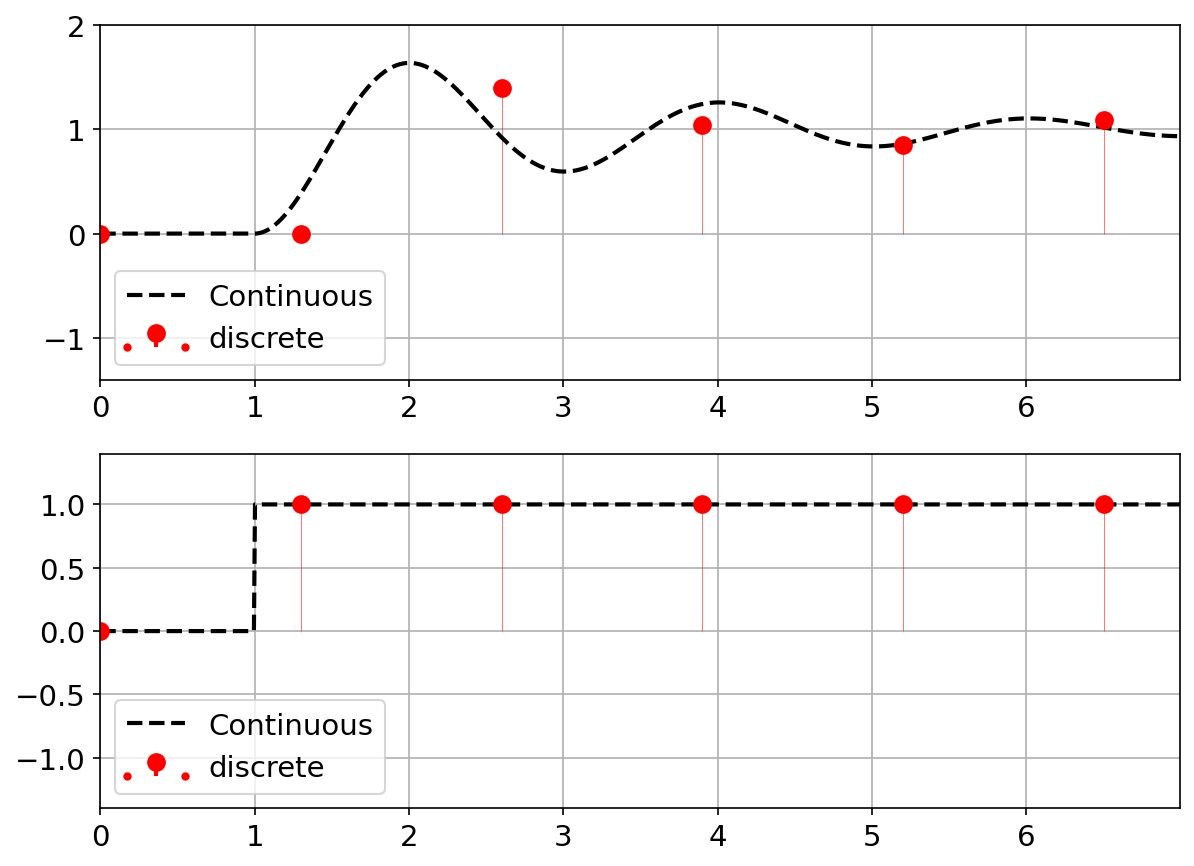

In [89]:
# plot
fig, (ax1,ax2) = plt.subplots(2,figsize=(8, 6),dpi=150)
ax1.plot(t, y, 'k--', label='Continuous', linewidth=2)
my_stem(t_d,y_d,ax1,lab='discrete')

ax1.axis([t[0], t[-2], -1.4, int(max(y))+1])
ax1.legend(loc='best')

ax2.plot(t, u, 'k--', label='Continuous', linewidth=2)
my_stem(t_d,u_d,ax2,lab='discrete')
ax2.axis([t[0], t[-2], -1.4, 1.4])
ax2.legend(loc='best')
fig.tight_layout()
plt.show()

In [90]:
Gz = ss2tf(d_system.A, d_system.B, d_system.C, d_system.D)

In [91]:
ee,eev = np.linalg.eig(A)
ee[0]

(-0.45+3.130095845177908j)

In [92]:
ed,evd = np.linalg.eig(d_system.A)
ed[0]

(-0.3341580020604502+0.44576380620733846j)